# 1. pycaret 활용하기(전처리)

In [ ]:
# pip install numpy==1.20 # numpy 버전 경고가 뜰 경우 코드 실행할 것!

In [ ]:
# pip install pycaret # pycaret 설치

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *  # numpy 버전 오류가 날 경우 numpy 재설치하면 오류 해결
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
%config InlineBackend.figure_format = 'retina'/

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/스터디/집/train.csv')
test = pd.read_csv('/content/drive/MyDrive/스터디/집/test.csv')

In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.00000,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.00000,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.00000,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.00000,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


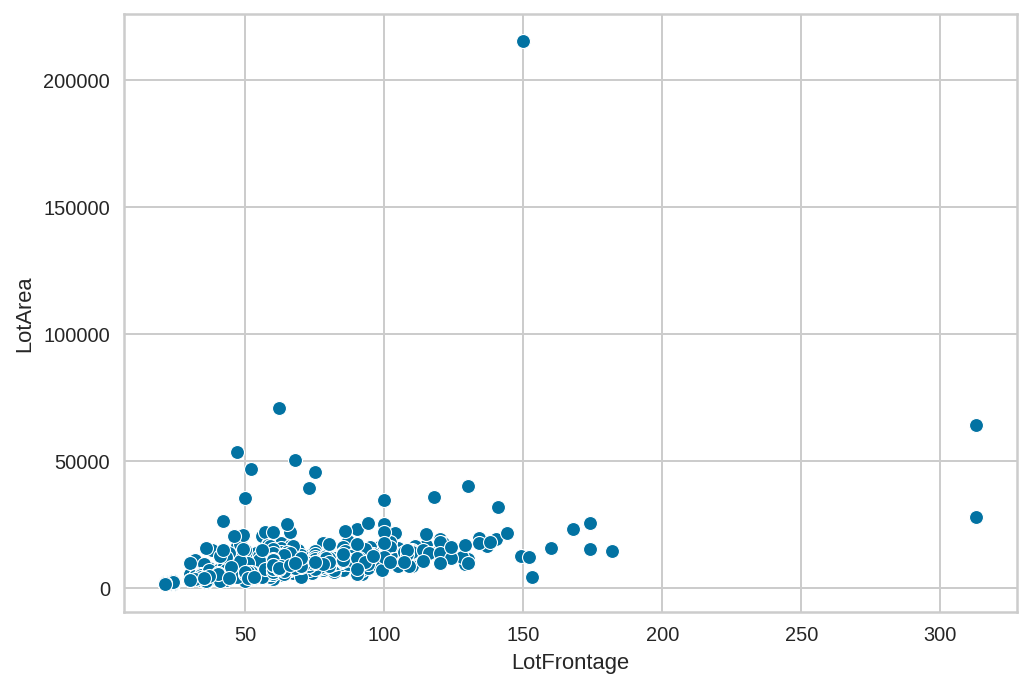

In [ ]:
sns.scatterplot(data=train, x='LotFrontage', y='LotArea')

## 1 - 1 결측치 확인

In [ ]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
train['GarageType'].value_counts()  # BsmtCond는 최빈값으로 제거 가능 , BsmtFinType2

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
# Garage(차고)가 없는 집이 결측치로 인식됨, 차고 없는 집에 대한 차고 관련 데이터 모두 'NA'로 데이터값 지정
train.loc[train['GarageType'].isna(), 'GarageType'] = 'NA'
train.loc[train['GarageYrBlt'].isna(), 'GarageYrBlt'] = 'NA'
train.loc[train['GarageFinish'].isna(), 'GarageFinish'] = 'NA'
train.loc[train['GarageQual'].isna(), 'GarageQual'] = 'NA'
train.loc[train['GarageCond'].isna(), 'GarageCond'] = 'NA'


test.loc[test['GarageType'].isna(), 'GarageType'] = 'NA'
test.loc[test['GarageYrBlt'].isna(), 'GarageYrBlt'] = 'NA'
test.loc[test['GarageFinish'].isna(), 'GarageFinish'] = 'NA'
test.loc[test['GarageQual'].isna(), 'GarageQual'] = 'NA'
test.loc[test['GarageCond'].isna(), 'GarageCond'] = 'NA'

In [ ]:
# Fireplaces가 없는 집 역시 FireplaceQu가 결측치로 기록됨, 'NA'로 변경
train.loc[train['FireplaceQu'].isna(), 'FireplaceQu'] = 'NA'

test.loc[test['FireplaceQu'].isna(), 'FireplaceQu'] = 'NA'

In [ ]:
# Electrical는 최빈값으로 결측치를 채움
train.loc[train['Electrical'].isna(), 'Electrical'] = 'SBrkr'

test.loc[test['Electrical'].isna(), 'Electrical'] = 'SBrkr'

In [ ]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
# Basement 또한 없는 집의 경우 관련 데이터가 모두 결측치 처리 되었음, 'NA'로 변경
train.loc[train['BsmtQual'].isna(), 'BsmtQual'] = 'NA'
train.loc[train['BsmtCond'].isna(), 'BsmtCond'] = 'NA'
train.loc[train['BsmtExposure'].isna(), 'BsmtExposure'] = 'NA'
train.loc[train['BsmtFinType1'].isna(), 'BsmtFinType1'] = 'NA'
train.loc[train['BsmtFinType2'].isna(), 'BsmtFinType2'] = 'NA'

test.loc[test['BsmtQual'].isna(), 'BsmtQual'] = 'NA'
test.loc[test['BsmtCond'].isna(), 'BsmtCond'] = 'NA'
test.loc[test['BsmtExposure'].isna(), 'BsmtExposure'] = 'NA'
test.loc[test['BsmtFinType1'].isna(), 'BsmtFinType1'] = 'NA'
test.loc[test['BsmtFinType2'].isna(), 'BsmtFinType2'] = 'NA'

In [ ]:
# MasVnr(담벼락) 결측치는 담벼락이 없는 건물로 간주
train.loc[train['MasVnrType'].isna(), 'MasVnrType'] = 'None'

test.loc[test['MasVnrType'].isna(), 'MasVnrType'] = 'None'

In [ ]:
# 결측치가 많은 열, 중복열 등 필요없는 열 제거
drop_cols = ['Alley', 'PoolQC','Fence', 'MiscFeature', 'TotalBsmtSF', 'GrLivArea','TotRmsAbvGrd', 'MiscVal', 'Id']
train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.00000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.00000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.00000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.00000,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.00000,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.00000,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,5,2010,WD,Normal,266500
1458,20,RL,68.00000,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,4,2010,WD,Normal,142125


In [ ]:
train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 72, dtype: int64

In [ ]:
test.isna().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
PoolArea           0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 71, dtype: int64

## 1 - 2 pycaret 활용한 최종전처리

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,Typ,0,NA,Attchd,2003.00000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.00000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976.00000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.00000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.00000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.00000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.00000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.00000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# 수치형 데이터 분리
num_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','1stFlrSF', '2ndFlrSF', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
            '3SsnPorch','ScreenPorch', 'PoolArea']
category_cols = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition']

In [ ]:
exp = setup(data = train,  
            target = 'SalePrice',
            
            normalize = True,
            normalize_method = 'zscore',
            # if normalize = True
            # normalize_method = 'minmax', # 기본은 zscore 
            
            transformation = True, 
            
            fold = 5, # 기본적으로 10 fold 로 training 한다.
            fold_shuffle=True,
            imputation_type='iterative',  # 결측치를 lightgbm으로 채워줌
            iterative_imputation_iters=10,
            
            ignore_features = [], # 제외할 컬럼 (이거 너무 편하다!)
            numeric_features = num_cols,
            categorical_features = category_cols, # 지정하면 onehotencoding된다. 최근 핫한 모델 catboost : 모델 튜닝할 때 알아서 가변수화나 라벨인코딩(처리속도 굉장히 빠름)
            date_features = [], # 날짜 feature를 년월일시 로 바꿔서 onehotencoding 해준다. 
      
            silent = True,  # setup 시 중간에 피쳐속성 확인하고 엔터 쳐줘야하는데 알아서 넘어가게 해준다.
            # train_size = 0.7 디폴트값
            session_id = 2022) # random state number 지정
            # use_gpu = True, # gpu 사용 옵션
            
            # feature_selection = True,
            # feature_selection_method = 'classic', # or 'boruta'
            # fix_imbalance = True, # data imbalance 를 sampling method로 보정
            # fix_imbalance_method = imblearn.OverSampling.RandomOverSampler()
            # 기본은 SMOTE(대세)

,Description,Value
0,session_id,2022
1,Target,SalePrice
2,Original Data,"(1460, 72)"
3,Missing Values,True
4,Numeric Features,15
5,Categorical Features,56
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 599)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['MSSubClass',
                                                            'MSZoning',
                                                            'Street',
                                                            'LotShape',
                                                            'LandContour',
                                                            'Utilities',
                                                            'LotConfig',
                                                            'LandSlope',
                                                            'Neighborhood',
                                                            'Condition1',
                                                            'Condition2',
                                

In [ ]:
train_transform = get_config('X') # train 데이터
train_transform

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X)
INFO:logs:Global variable: X returned as       LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0        -0.15353 -0.17219     1.25270     0.77829    -0.34517   -1.07072   
1         0.50264  0.12895    -0.75478     1.20268    -0.34517   -0.59998   
2        -0.01291  0.49244     1.11618     0.34217    -0.34517   -0.13371   
3        -0.39780  0.11669    -0.75478    -0.39588    -0.34517    0.15396   
4         0.66097  0.99495     1.58633     0.68656    -0.34517    0.02279   
...           ...      ...         ...         ...         ...        ...   
1455     -0.29868 -0.32563    -0.75478    -1.15877    -0.34517    0.98935   
1456      0.69972  0.83255     0.87062     0.91988     2.92728    0.27437   
1457     -0.10614 -0.01212    -0.75478    -0.21332    -0.34517    0.85918   
1458     -0.01291  0.15734    -0.75478    -0.97306     2.94248   -1.65410   
1459      0.29621  0.20961    -0.75478     

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.15353,-0.17219,1.25270,0.77829,-0.34517,-1.07072,-0.80699,1.19929,0.37478,-0.87904,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,0.50264,0.12895,-0.75478,1.20268,-0.34517,-0.59998,0.48980,-0.86981,-0.03358,1.50585,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,-0.01291,0.49244,1.11618,0.34217,-0.34517,-0.13371,-0.55999,1.21347,0.65038,-0.87904,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
3,-0.39780,0.11669,-0.75478,-0.39588,-0.34517,0.15396,-0.40966,1.07634,0.80572,-0.87904,...,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000
4,0.66097,0.99495,1.58633,0.68656,-0.34517,0.02279,0.18396,1.41452,1.68319,1.13111,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.29868,-0.32563,-0.75478,-1.15877,-0.34517,0.98935,-0.43850,0.99111,-0.03358,-0.87904,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1456,0.69972,0.83255,0.87062,0.91988,2.92728,0.27437,1.89535,-0.86981,0.15274,1.63487,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1457,-0.10614,-0.01212,-0.75478,-0.21332,-0.34517,0.85918,0.30233,1.50826,-1.01955,-0.87904,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1458,-0.01291,0.15734,-0.75478,-0.97306,2.94248,-1.65410,-0.01625,-0.86981,-1.07710,1.67304,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000


# 2. 모델링하기

In [ ]:
# pip install xgboost==1.1.0

In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## best3 모델 추출

In [100]:
best3 = compare_models(sort='RMSLE', n_select = 3)  # 전체 모델 다 돌려보고 성능 상위 3개만 가져오기
                                                 # budget_time : 학습 시간 제한(학습이 오래 걸리는 모델들은 걸러짐)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,16987.97250,881885552.28130,29345.54440,0.86330,0.14080,0.09890,4.60600
par,Passive Aggressive Regressor,17689.81590,975975457.21640,30993.16300,0.84660,0.14540,0.10210,1.02800
lightgbm,Light Gradient Boosting Machine,18657.72800,961929270.76190,30752.88240,0.84980,0.15320,0.10960,0.13200
gbr,Gradient Boosting Regressor,19151.06140,1067680709.52540,32037.12250,0.83490,0.15700,0.11370,0.63400
xgboost,Extreme Gradient Boosting,20136.85320,1168540539.74480,33576.06230,0.81860,0.16080,0.11710,1.38600
huber,Huber Regressor,18806.81780,1014601160.84670,31502.25230,0.83950,0.16310,0.11170,0.33600
rf,Random Forest Regressor,20288.76450,1122631201.56400,33301.59960,0.82280,0.16800,0.12110,1.44400
en,Elastic Net,21816.03060,1420058459.51460,37433.54070,0.77780,0.17260,0.12580,0.05800
omp,Orthogonal Matching Pursuit,20474.12750,1238724379.86180,34727.16060,0.80260,0.17400,0.12230,0.04200
knn,K Neighbors Regressor,23212.52000,1428771854.86240,37481.18800,0.77670,0.18240,0.13210,0.13200


INFO:logs:create_model_container: 67
INFO:logs:master_model_container: 67
INFO:logs:display_container: 11
INFO:logs:[<catboost.core.CatBoostRegressor object at 0x7fab1a5a4c90>, PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=2022, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2022, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_f

In [ ]:
best3  # n_select = 3 를 설정하여 최상위 모델 3개만 가져옴

In [ ]:
best_top3 = [tune_model(i, optimize = 'RMSLE', n_iter=50) for i in best3]  # top3 모델들을 각각 튜닝, n_iter 디폴트는 10

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=<catboost.core.CatBoostRegressor object at 0x7fab1a5a4c90>, fold=None, round=4, n_iter=50, custom_grid=None, optimize=RMSLE, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=False, fit_kwargs=None, groups=None, return_tuner=False, verbose=True, tuner_verbose=True, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:38:19
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : CatBoost Regressor
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing RandomizedSearchCV
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
best3 # 위의 best3 출력과 비교했을 때 파라미터 값들이 튜닝된 것을 확인

In [ ]:
# 개별 모델 성능평가  ㅇㄹ
# xgb_model = create_model('xgboost',
#                          return_train_score = True,    # return_train_score는 train 데이터로만 score 가져오는 것(데이터가 너무 클 때)
#                          cross_validation=True)        # cross_validation은 디폴트가 True, 마찬가지로 데이터가 너무 크면 시간이 오래 걸리므로 False지정 가능

In [ ]:
# xgboost 튜닝
# tuned_xgb_model = tune_model(xgb_model, optimize = 'R2', n_iter = 20)

# 3. Blending하기 (voting)

In [ ]:
# 모델 Blending (voting)  , 상위 3개 모델들로 voting을 하자!
blend_3 = blend_models(estimator_list = best3, fold= 5, optimize='RMSLE')  # 분류 문제일 경우 method = soft or hard 선택 (일반적으로는 soft voting 선호됨)
                                                                             # fold는 setup에서 지정했을 경우 따로 설정 안 해줘도 됨(setup의 폴드 수를 사용)

# 위의 모델들 보다 voting했을 때 성능이 향상되었음을 알 수 있음!

# 4. Stacking하기



In [ ]:
stacker_3 = stack_models(estimator_list = best3[1:], meta_model = best3[0], optimize='RMSLE')  # meta_model : 데이터 stacking 후 평가에 사용할 최종모델
                                                                             # best3[0] : best3 중 가장 좋은 성능 지닌 모델을 최종모델로 선정

# Stacking에서 가장 좋은 성능을 보였음!

# 최종예측

In [ ]:
# 최종예측
final_model = finalize_model(stacker_3)
prediction = predict_model(final_model, data=test)  # train에서 없었던 결측치까지 lightgbm을 활용하여 결측치를 채워줌

In [ ]:
# 제출파일 생성
submission = pd.read_csv('https://github.com/DX5-Study/House/raw/main/sample_submission.csv')
submission['SalePrice'] = prediction['Label']
submission

In [ ]:
# 제출파일 저장
submission.to_csv('submission.csv', index=False)